# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Yani Yulianti
- **Email:** yaniyul2712@gmail.com
- **ID Dicoding:** yaniyul

## Menentukan Pertanyaan Bisnis

- Daerah manakah yang memiliki kualitas udara terbaik?
- Daerah manakah yang memiliki kualitas udara terburuk?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Aotizhongxin_20130301-20170228.csv to PRSA_Data_Aotizhongxin_20130301-20170228.csv
Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228.csv
Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv
Saving PRSA_Data_Dongsi_20130301-20170228.csv to PRSA_Data_Dongsi_20130301-20170228.csv
Saving PRSA_Data_Guanyuan_20130301-20170228.csv to PRSA_Data_Guanyuan_20130301-20170228.csv
Saving PRSA_Data_Gucheng_20130301-20170228.csv to PRSA_Data_Gucheng_20130301-20170228.csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228.csv
Saving PRSA_Data_Nongzhanguan_20130301-20170228.csv to PRSA_Data_Nongzhanguan_20130301-20170228.csv
Saving PRSA_Data_Shunyi_20130301-20170228.csv to PRSA_Data_Shunyi_20130301-20170228.csv
Saving PRSA_Data_Tiantan_20130301-20170228.csv to PRSA_Data_Tiantan_20130301-20170228.csv
Saving PRSA_Data_Wanliu_20130301-20170228.csv to PRSA_Data_Wanliu_20130301-2

In [5]:
dataframes =[]
for filename in uploaded.keys():
  df = pd.read_csv(filename)
  dataframes.append(df)

In [6]:
all_df = pd.concat(dataframes, ignore_index=True)

In [7]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [9]:
all_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

In [12]:
all_df.dropna(axis=0, inplace=True)

In [13]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
mean_air_quality = all_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

In [15]:
best_air_quality = mean_air_quality.sort_values(by='PM2.5').head(5)
print(best_air_quality)

               PM2.5        PM10        SO2        NO2           CO         O3
station                                                                       
Dingling   66.512518   84.527803  11.944167  27.267578   916.547211  69.449698
Huairou    70.285669   92.525792  12.275823  32.633827  1032.398291  59.722474
Changping  70.312328   94.086402  15.061357  44.319035  1151.716441  57.424541
Shunyi     79.400725   99.380546  14.144105  44.838483  1201.778267  55.297919
Tiantan    81.749840  105.627866  14.140742  53.213083  1297.434187  55.297030


In [16]:
worst_air_quality = mean_air_quality.sort_values(by='PM2.5', ascending=False).head(5)
print(worst_air_quality)

                   PM2.5        PM10        SO2        NO2           CO  \
station                                                                   
Dongsi         84.933156  110.991914  16.994466  53.717314  1316.524392   
Nongzhanguan   84.720783  109.175929  18.560198  58.213457  1327.784381   
Wanshouxigong  84.238510  111.918692  17.152569  55.307181  1362.531647   
Gucheng        83.865653  119.085002  15.095190  55.583879  1325.509691   
Guanyuan       83.101051  108.974559  17.263085  57.698591  1265.709760   

                      O3  
station                   
Dongsi         56.797482  
Nongzhanguan   58.614905  
Wanshouxigong  55.922622  
Gucheng        58.280651  
Guanyuan       55.832982  


## Visualization & Explanatory Analysis

### Pertanyaan 1:

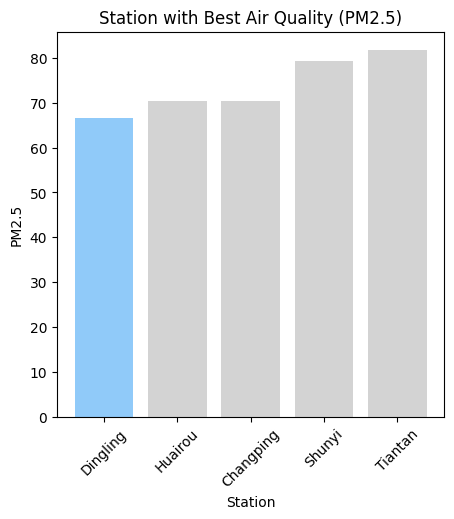

In [17]:
plt.figure(figsize=(5, 5))
plt.bar(best_air_quality.index, best_air_quality['PM2.5'], color=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title('Station with Best Air Quality (PM2.5)')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

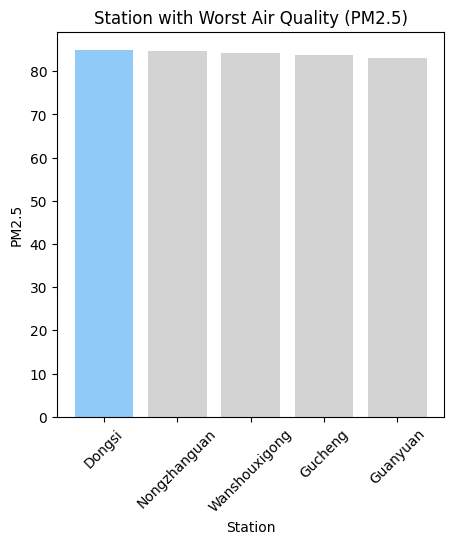

In [18]:
plt.figure(figsize=(5, 5))
plt.bar(worst_air_quality.index, worst_air_quality['PM2.5'], color=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title('Station with Worst Air Quality (PM2.5)')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  Berdasarkan analisis tersebut, terlihat bahwa Dingling merupakan station yang memiliki kualitas udara terbaik yaitu dengan mean PM2.5 sebesar 66.512518. Semakin kecil nilai rata-ratanya, maka kualitas udara semakin bagus.
- Conclution pertanyaan 2:
  Berdasarkan analisis tersebut, terlihat bahwa Dongsi merupakan station yang memiliki kualitas udara terburuk yaitu dengan mean PM2.5 sebesar 84.933156. Semakin besar nilai rata-ratanya, maka kualitas udara semakin buruk.

In [19]:
all_df.to_csv("all_data.csv", index=False)